In [1]:
import numpy as np
import pandas as pd
import random
from random import  uniform
import statistics
import matplotlib.pyplot as plt
import seaborn as sn

# Classe do neurônio de Rosenblatt

In [2]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.x_treino = np.array([])
        self.x_teste = np.array([])
        
        self.carrega_dados()
        
        self.pesos = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
        
    def carrega_dados_treino_e_teste(self):
        random.shuffle(self.dados)

        distribuicao = int(len(self.dados)*0.7)

        self.x_treino = self.dados[:distribuicao]
        self.x_teste  = self.dados[distribuicao:]
    
    def carrega_dados(self):
        dataset = np.fromfile('dataHoldout.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados = dataset.reshape(linhas, colunas)
        
        self.carrega_dados_treino_e_teste()
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        numero_de_ajustes = 0
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            numero_de_ajustes += 1
            print("Dado: ",entrada[1:],"\n")
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos
        
        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        print("-----------------------------\nÉpoca: ",self.epocas,"\n")
        #100 epocas
        while(self.epocas<100):
            if(self.perceptron() == False):
                self.epocas += 1
                print("-----------------------------\nÉpoca: ",self.epocas,"\n")
            else:
                break
            
        self.descobre_x1_x2()

        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos nos pesos: ",sum(self.total_de_ajustes))
        
n = Neuronio()

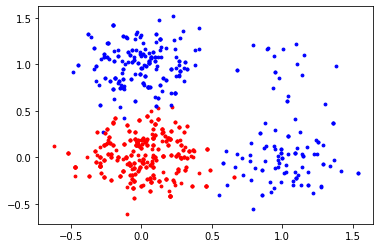

In [3]:
n.mostra_grafico()

In [4]:
n.dados = n.x_treino
n.treino()

-----------------------------
Época:  1 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  2 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  3 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  4 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  5 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  6 

Dado:  [-0.29322959 -0.09065359] 

-----------------------------
Época:  7 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

-----------------------------
Época:  8 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.

Dado:  [-0.08041492 -0.18693755] 

Dado:  [0.36754371 0.0090821 ] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.06832331  1.1562397 ] 

-----------------------------
Época:  11 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.06282733 -0.3

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.12020386 0.40989806] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.15371662 0.27078076] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.25776183 0.03455125] 

Dado:  [-0.20009509  0.37511566] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.08298076 0.12868493] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [0.2367801  0.37531654] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [-0.22615337  0.1493509 ] 

Dado:  [-0.06865786 -0.18994482] 

Dado:  [0.19031887 0.13251078] 

Dado:  [0.19031887 0.13251078] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.46304142 0.09405471] 

Dado:  [ 0.23012362 -0.26821715] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.09509565 0.35550407] 

Dado:  [0.3

Dado:  [0.07413358 0.09435939] 

Dado:  [0.08097161 0.30854443] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.04162565  0.12822745] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [ 0.17261639 -0.23042727] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [ 0.10170691 -0.02426339] 

Dado:  [0.37222961 0.06930466] 

Dado:  [-0.02228633  0.03087271] 

Dado:  [0.27683823 0.00061479] 

Dado:  [0.03416729 0.17169338] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [0.14347628 0.25927685] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [ 0.15207387 -0.1526586 ] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [0.26394155 0.32750883] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:

Dado:  [-0.16562461  0.00357497] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.05213949 -0.05768201] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [-0.13180539  0.94778105] 

Dado:  [-0.2175649  -0.24798023] 

Dado:  [0.04070169 0.19547759] 

Dado:  [ 0.27835023 -0.27168854] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.01442025 -0.02745483] 

Dado:  [ 0.19559446 -0.36660313] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.02409823 0.16569508] 

Dado:  [0.09475184 0.00442865] 

Dado:  [0.21265355 0.2789915 ] 

Dado:  [0.14927021 0.30009393] 

Dado:  [-0.1985048   1.41827045] 

Dado:  [0.27534583 0.92380154] 

Dado:  [-0.02677506  0.19158953] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.04070907 0.1350255 ] 

Dado:  [0.23384007 1.26181376] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [0.15371662 0.27078076] 

Dado:  [0.25776183 0.03455125] 

Dado:  [0

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [0.36729907 0.07514918] 

Dado:  [0.25527419 0.17171587] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.17537603 0.17826557] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.13057195 -0.14399009] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [0.15252857 0.01744889] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [ 0.10170691 -0.02426339] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [-0.32030378 -0.05453506] 

D


Dado:  [0.28066172 0.13031361] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-0.28552876 -0.16910219] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.32622018 -0.00707064] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.08879326 -0.07108222] 

Dado:  [0.1196882  0.08875686] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [0.20300365 0.19595358] 

Dado:  [ 0.0748692  -0.03487411] 

Dado:  [0.09509565 0.35550407] 

Dado:  [0.07413358 0.09435939] 

Dado:  [0.08097161 0.30854443] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.04162565  0.12822745] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [ 0.45659077 -0.31018866] 



Dado:  [-0.02228633  0.03087271] 

Dado:  [0.27683823 0.00061479] 

Dado:  [0.03416729 0.17169338] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [0.14347628 0.25927685] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [ 0.15207387 -0.1526586 ] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [0.26394155 0.32750883] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.20300365 0.19595358] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [ 0.32622018 -0.00707064] 

Dado:  [0.15252857 0.01744889] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.08041492 -0.18693755] 

Dado:  [0.36754371 0.0090821 ] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:

Dado:  [-0.03197237  0.16450966] 

Dado:  [ 0.32622018 -0.00707064] 

Dado:  [0.15252857 0.01744889] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.08041492 -0.18693755] 

Dado:  [0.36754371 0.0090821 ] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [0.15640596 0.84981368] 

Dado:  [-0.0547258  -0.11131214] 

Dado:  [-0.05640173  0.06447469] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [ 0.17261639 -0.23042727] 

Dado:  [0.2123362  0.02517371] 

Dado:  [0.04070907 0.1350255 ] 

Dado:  [-0.05039096 -0.43980938] 

Dado:  [0.05481746 1.01844515] 

Dado:  [0.08690974 0.00654493] 

Dado:  [-0.22393185  0.81629245] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [-0.0547258  -0.11131214] 

Dado:  [ 0.48892004 -0.13726797] 

D

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.08041492 -0.18693755] 

Dado:  [0.36754371 0.0090821 ] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [0.15640596 0.84981368] 

Dado:  [-0.0547258  -0.11131214] 

Dado:  [-0.05640173  0.06447469] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [ 0.17261639 -0.23042727] 

Dado:  [0.2123362  0.02517371] 

Dado:  [0.04070907 0.1350255 ] 

Dado:  [-0.05039096 -0.43980938] 

Dado:  [0.05481746 1.01844515] 

Dado:  [0.08690974 0.00654493] 

Dado:  [-0.22393185  0.81629245] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [-0.0547258  -0.11131214] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:  [-0.16562461  0.00357497] 

Dado:  [-0.19087107  1.1429872 ] 

Dado:  [ 0.45659077 -0.31018866] 


Dado:  [0.15252857 0.01744889] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.08041492 -0.18693755] 

Dado:  [0.36754371 0.0090821 ] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [0.15640596 0.84981368] 

Dado:  [-0.0547258  -0.11131214] 

Dado:  [-0.05640173  0.06447469] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [ 0.17261639 -0.23042727] 

Dado:  [0.2123362  0.02517371] 

Dado:  [0.04070907 0.1350255 ] 

Dado:  [-0.05039096 -0.43980938] 

Dado:  [0.05481746 1.01844515] 

Dado:  [0.08690974 0.00654493] 

Dado:  [-0.22393185  0.81629245] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [-0.0547258  -0.11131214] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:  [-0.16562461  0.00357497] 

D

Dado:  [0.19031887 0.13251078] 

Dado:  [0.19031887 0.13251078] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.46304142 0.09405471] 

Dado:  [ 0.23012362 -0.26821715] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.09509565 0.35550407] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.25504586  0.25995271] 

Dado:  [0.19031887 0.13251078] 

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [0.09509565 0.35550407] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [ 0.22245222 -0.2466912 ] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.18777062  0.42687831] 

Dado:  [0.15252857 0.01744889] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.36729907 0.07514918] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [ 0.48

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.27238274 0.18359397] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07028775 0.39056305] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.09127282  0.28768163] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [0.29560862 0.08406349] 

Dado:  [-0.20389569  0.36597829] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [0.08690974 0.00654493] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [0.28066172 0.13031361]

Dado:  [-0.06835829 -0.22927445] 

Dado:  [-0.24470797  0.30017534] 

Dado:  [-0.48420554  0.9196465 ] 

Dado:  [ 0.12177941 -0.25516114] 

Dado:  [-0.05213949 -0.05768201] 

Dado:  [-0.13422123  0.90441797] 

Dado:  [0.24063399 0.68816436] 

Dado:  [0.07957988 1.12760559] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [0.19643799 0.20349331] 

Dado:  [-0.31954642  0.82446805] 

Dado:  [-0.21748562  0.03151915] 

Dado:  [-0.10671724 -0.00445963] 

Dado:  [-0.03134909  1.34302578] 

Dado:  [ 0.31474715 -0.09874167] 

Dado:  [0.02913203 0.02879716] 

Dado:  [-0.25518628  0.85789816] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.02088851  0.14046572] 

Dado:  [0.26852925 1.03941518] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.40965325 1.15994907] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [ 0.06285892 -0.224167  ] 

Dado:  [-0.15221157  0.74442203] 

Dado:  [-0.06574713  1.02938836] 

Dado:  [-0.23436994  0.03978647] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [0.14139125 1.19105258] 


Dado:  [0.24063399 0.68816436] 

Dado:  [0.07957988 1.12760559] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [0.19643799 0.20349331] 

Dado:  [-0.31954642  0.82446805] 

Dado:  [-0.21748562  0.03151915] 

Dado:  [-0.10671724 -0.00445963] 

Dado:  [-0.03134909  1.34302578] 

Dado:  [ 0.31474715 -0.09874167] 

Dado:  [0.02913203 0.02879716] 

Dado:  [-0.25518628  0.85789816] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.02088851  0.14046572] 

Dado:  [0.26852925 1.03941518] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.40965325 1.15994907] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [ 0.06285892 -0.224167  ] 

Dado:  [-0.15221157  0.74442203] 

Dado:  [-0.06574713  1.02938836] 

Dado:  [-0.23436994  0.03978647] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [0.14139125 1.19105258] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.37558138  1.32850046] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.13232947 1.27097706] 

Dado:  [0.02913203 0.02879716] 

Dado:  [0.0474884  0.76108048] 

Dado:  [0

Dado:  [0.32606995 0.33196305] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.25504586  0.25995271] 

Dado:  [0.19031887 0.13251078] 

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [0.09509565 0.35550407] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [ 0.22245222 -0.2466912 ] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.18777062  0.42687831] 

Dado:  [0.15252857 0.01744889] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.36729907 0.07514918] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [0.36729907 0.07514918] 

Dado:  [0.25527419 0.17171587] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.17537603 0.17826557] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.13

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [0.28066172 0.13031361] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [0.20300365 0.19595358] 

Dado:  [0.2123362  0.02517371] 

Dado:  [0.20300365 0.19595358] 

Dado:  [0.20300365 0.19595358] 

Dado:  [0.02409823 0.16569508] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [0.0824192  0.00106606] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.30399699 0.00645548] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [0.09743172 0.24002227] 

Dado:  [-0.20389569  0.36597829] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [0.34015635 0.06961302] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.26394155 0.32750883] 

Dado:  [0.20300365 0.19595358] 

Dado:  [-0.1039

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.10391518  0.34638192] 

-----------------------------
Época:  46 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.0

Dado:  [ 0.66026778 -0.21191075] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.15397487  0.54062754] 

Dado:  [-0.46980094 -0.20331005] 

Dado:  [0.16775772 0.22831062] 

Dado:  [0.25776183 0.03455125] 

Dado:  [-0.24470797  0.30017534] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [-0.04347767 -0.18293735] 

Dado:  [0.05481746 1.01844515] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [-0.44685336  0.99308477] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.04162565  0.12822745] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.05213949 -0.05768201] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.0150527  -0.12832773] 

Dado:  [ 0.26072056 -0.14729552] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [0.16775772 0.22831062] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.08097161 0.30854443] 

Dado:  [0.07187886 1.06873787] 

Dado:  [-0.06835829 -0.22927445] 

D

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.10391518  0.34638192] 

-----------------------------
Época:  50 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.15397487  0.54062754] 

Dado:  [-0.46980094 -0.20331005] 

Dado:  [0.16775772 0.22831062] 

Dado:  [0.25776183 0.03455125] 

Dado:  [-0.24470797  0.30017534] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [-0.04347767 -0.18293735] 

Dado:  [0.05481746 1.01844515] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [-0.44685336  0.99308477] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.04162565  0.12822745] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.05213949 -0.05768201] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.0150527  -0.12832773] 

Dado:  [ 0.26072056 -0.14729552] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [0.16775772 0.22831062] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.08097161 0.30854443] 

Dado:  [0.07187886 1.06873787] 

Dado:  [-0.06835829 -0.22927445] 

Dado:  [-0.24470797  0.30017534] 

D

Dado:  [-0.05640173  0.06447469] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [ 0.17261639 -0.23042727] 

Dado:  [0.2123362  0.02517371] 

Dado:  [0.04070907 0.1350255 ] 

Dado:  [-0.05039096 -0.43980938] 

Dado:  [0.05481746 1.01844515] 

Dado:  [0.08690974 0.00654493] 

Dado:  [-0.22393185  0.81629245] 

Dado:  [-0.17369552 -0.02572443] 

Dado:  [-0.0547258  -0.11131214] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:  [-0.16562461  0.00357497] 

Dado:  [-0.19087107  1.1429872 ] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [0.00394505 0.1408983 ] 

Dado:  [-0.62237404  0.12119507] 

Dado:  [-0.26652617 -0.02689509] 

Dado:  [0.14555276 0.70970773] 

Dado:  [0.12052833 0.52761443] 

Dado:  [-0.31310084  0.27736732] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [-0.16562461  0.00357497] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.05213949 -0.05768201] 

Dad

Dado:  [ 0.00531634 -0.05266985] 

Dado:  [0.28066172 0.13031361] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-0.28552876 -0.16910219] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.32622018 -0.00707064] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.08879326 -0.07108222] 

Dado:  [0.1196882  0.08875686] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [0.20300365 0.19595358] 

Dado:  [ 0.0748692  -0.03487411] 

Dado:  [0.09509565 0.35550407] 

Dado:  [0.07413358 0.09435939] 

Dado:  [0.08097161 0.30854443] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.04162565  0.12822745] 

Dado:  [ 0.45659077 -0.31018866] 

D

Dado:  [0.19031887 0.13251078] 

Dado:  [0.19031887 0.13251078] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.46304142 0.09405471] 

Dado:  [ 0.23012362 -0.26821715] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.09509565 0.35550407] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.25504586  0.25995271] 

Dado:  [0.19031887 0.13251078] 

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [0.09509565 0.35550407] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [ 0.22245222 -0.2466912 ] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.18777062  0.42687831] 

Dado:  [0.15252857 0.01744889] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.36729907 0.07514918] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [ 0.48

Dado:  [0.02913203 0.02879716] 

Dado:  [0.0474884  0.76108048] 

Dado:  [0.26357898 0.89001155] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.15640596 0.84981368] 

Dado:  [0.22481021 1.51639247] 

Dado:  [0.10233626 0.55422473] 

Dado:  [0.1196882  0.08875686] 

Dado:  [-0.29580217  0.56265815] 

Dado:  [-0.27139883  0.26947543] 

-----------------------------
Época:  57 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

D

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [0.36729907 0.07514918] 

Dado:  [0.25527419 0.17171587] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.17537603 0.17826557] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.13057195 -0.14399009] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [0.15252857 0.01744889] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [ 0.10170691 -0.02426339] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [-0.32030378 -0.05453506] 

Dado:  [ 0.00531634 -0.05266985] 

Dado:  [0.28066172 0.13031361] 

Dad

Dado:  [-0.00940128 -0.10654841] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.26394155 0.32750883] 

Dado:  [0.20300365 0.19595358] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [0.07028775 0.39056305] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [-0.10038537 -0.60750339] 

Dado:  [0.2367801  0.37531654] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.07722405  0.18953338] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.12020386 0.40989806] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.15371662 0.27078076] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.25776183 0.03455125] 

Dado:  [-0.20009509  0.37511566] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.08298076 0.12868493] 

Dado:  [-


Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.10391518  0.34638192] 

-----------------------------
Época:  64 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.01465206  

Dado:  [-0.13422123  0.90441797] 

Dado:  [0.24063399 0.68816436] 

Dado:  [0.07957988 1.12760559] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [0.19643799 0.20349331] 

Dado:  [-0.31954642  0.82446805] 

Dado:  [-0.21748562  0.03151915] 

Dado:  [-0.10671724 -0.00445963] 

Dado:  [-0.03134909  1.34302578] 

Dado:  [ 0.31474715 -0.09874167] 

Dado:  [0.02913203 0.02879716] 

Dado:  [-0.25518628  0.85789816] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.02088851  0.14046572] 

Dado:  [0.26852925 1.03941518] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.40965325 1.15994907] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [ 0.06285892 -0.224167  ] 

Dado:  [-0.15221157  0.74442203] 

Dado:  [-0.06574713  1.02938836] 

Dado:  [-0.23436994  0.03978647] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [0.14139125 1.19105258] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.37558138  1.32850046] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.13232947 1.27097706] 

Dado:  [0.02913203 0.02879716] 

Dado:  

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [-0.13180539  0.94778105] 

Dado:  [-0.2175649  -0.24798023] 

Dado:  [0.04070169 0.19547759] 

Dado:  [ 0.27835023 -0.27168854] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.01442025 -0.02745483] 

Dado:  [ 0.19559446 -0.36660313] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.02409823 0.16569508] 

Dado:  [0.09475184 0.00442865] 

Dado:  [0.21265355 0.2789915 ] 

Dado:  [0.14927021 0.30009393] 

Dado:  [-0.1985048   1.41827045] 

Dado:  [0.27534583 0.92380154] 

Dado:  [-0.02677506  0.19158953] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.04070907 0.1350255 ] 

Dado:  [0.23384007 1.26181376] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [0.15371662 0.27078076] 

Dado:  [0.25776183 0.03455125] 

Dado:  [0.09509565 0.35550407] 

Dado:  [-0.13057195 -0.14399009] 

Dado:  [ 0.66026778 -0.21191075] 

Dado:  [-

Dado:  [-0.02228633  0.03087271] 

Dado:  [0.27683823 0.00061479] 

Dado:  [0.03416729 0.17169338] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [0.14347628 0.25927685] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [ 0.15207387 -0.1526586 ] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [0.26394155 0.32750883] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.20300365 0.19595358] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [ 0.32622018 -0.00707064] 

Dado:  [0.15252857 0.01744889] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.08041492 -0.18693755] 

Dado:  [0.36754371 0.0090821 ] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:

Dado:  [0.09509565 0.35550407] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [ 0.22245222 -0.2466912 ] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.18777062  0.42687831] 

Dado:  [0.15252857 0.01744889] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.36729907 0.07514918] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [0.36729907 0.07514918] 

Dado:  [0.25527419 0.17171587] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.17537603 0.17826557] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.13057195 -0.14399009] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [0.12020386 0.40989806] 

Dado:

Dado:  [0.2123362  0.02517371] 

Dado:  [0.20300365 0.19595358] 

Dado:  [0.20300365 0.19595358] 

Dado:  [0.02409823 0.16569508] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [0.0824192  0.00106606] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.30399699 0.00645548] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [0.09743172 0.24002227] 

Dado:  [-0.20389569  0.36597829] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [0.34015635 0.06961302] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.26394155 0.32750883] 

Dado:  [0.20300365 0.19595358] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [0.07028775 0.39056305] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [-0.10

Dado:  [0.26357898 0.89001155] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.15640596 0.84981368] 

Dado:  [0.22481021 1.51639247] 

Dado:  [0.10233626 0.55422473] 

-----------------------------
Época:  73 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.10391518  0.3463819

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.37558138  1.32850046] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.13232947 1.27097706] 

Dado:  [0.02913203 0.02879716] 

Dado:  [0.0474884  0.76108048] 

Dado:  [0.26357898 0.89001155] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.15640596 0.84981368] 

Dado:  [0.22481021 1.51639247] 

Dado:  [0.10233626 0.55422473] 

Dado:  [0.1196882  0.08875686] 

Dado:  [-0.29580217  0.56265815] 

Dado:  [-0.27139883  0.26947543] 

-----------------------------
Época:  75 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:

Dado:  [0.0474884  0.76108048] 

Dado:  [0.26357898 0.89001155] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.15640596 0.84981368] 

Dado:  [0.22481021 1.51639247] 

Dado:  [0.10233626 0.55422473] 

Dado:  [0.1196882  0.08875686] 

Dado:  [-0.29580217  0.56265815] 

Dado:  [-0.27139883  0.26947543] 

-----------------------------
Época:  77 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 


Dado:  [0.26357898 0.89001155] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.15640596 0.84981368] 

Dado:  [0.22481021 1.51639247] 

Dado:  [0.10233626 0.55422473] 

-----------------------------
Época:  79 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [-0.00940128 -0.10654841] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.19908835  0.12926358] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [-0.10391518  0.3463819

Dado:  [0.14139125 1.19105258] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.37558138  1.32850046] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.13232947 1.27097706] 

Dado:  [0.02913203 0.02879716] 

Dado:  [0.0474884  0.76108048] 

Dado:  [0.26357898 0.89001155] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.15640596 0.84981368] 

Dado:  [0.22481021 1.51639247] 

Dado:  [0.10233626 0.55422473] 

Dado:  [0.1196882  0.08875686] 

Dado:  [-0.29580217  0.56265815] 

Dado:  [-0.27139883  0.26947543] 

-----------------------------
Época:  81 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [0.46304142 0.09405471] 

Dado:  [0.46304142 0.09405471] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.07988839 0.21101297] 

Dado:  [ 0.0114998  -0.05939114] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  

Dado:  [-0.13422123  0.90441797] 

Dado:  [0.24063399 0.68816436] 

Dado:  [0.07957988 1.12760559] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [0.19643799 0.20349331] 

Dado:  [-0.31954642  0.82446805] 

Dado:  [-0.21748562  0.03151915] 

Dado:  [-0.10671724 -0.00445963] 

Dado:  [-0.03134909  1.34302578] 

Dado:  [ 0.31474715 -0.09874167] 

Dado:  [0.02913203 0.02879716] 

Dado:  [-0.25518628  0.85789816] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.02088851  0.14046572] 

Dado:  [0.26852925 1.03941518] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.40965325 1.15994907] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [ 0.06285892 -0.224167  ] 

Dado:  [-0.15221157  0.74442203] 

Dado:  [-0.06574713  1.02938836] 

Dado:  [-0.23436994  0.03978647] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [0.14139125 1.19105258] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.37558138  1.32850046] 

Dado:  [0.30399699 0.00645548] 

Dado:  [0.13232947 1.27097706] 

Dado:  [0.02913203 0.02879716] 

Dado:  

Dado:  [-0.04162565  0.12822745] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.05213949 -0.05768201] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [-0.0150527  -0.12832773] 

Dado:  [ 0.26072056 -0.14729552] 

Dado:  [-0.29356844  0.00599321] 

Dado:  [0.16775772 0.22831062] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.08097161 0.30854443] 

Dado:  [0.07187886 1.06873787] 

Dado:  [-0.06835829 -0.22927445] 

Dado:  [-0.24470797  0.30017534] 

Dado:  [-0.48420554  0.9196465 ] 

Dado:  [ 0.12177941 -0.25516114] 

Dado:  [-0.05213949 -0.05768201] 

Dado:  [-0.13422123  0.90441797] 

Dado:  [0.24063399 0.68816436] 

Dado:  [0.07957988 1.12760559] 

Dado:  [-0.10074294 -0.31860073] 

Dado:  [0.19643799 0.20349331] 

Dado:  [-0.31954642  0.82446805] 

Dado:  [-0.21748562  0.03151915] 

Dado:  [-0.10671724 -0.00445963] 

Dado:  [-0.03134909  1.34302578] 

Dado:  [ 0.31474715 -0.09874167] 

D

Dado:  [0.07988839 0.21101297] 

Dado:  [-0.04162565  0.12822745] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [ 0.17261639 -0.23042727] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [ 0.10170691 -0.02426339] 

Dado:  [0.37222961 0.06930466] 

Dado:  [-0.02228633  0.03087271] 

Dado:  [0.27683823 0.00061479] 

Dado:  [0.03416729 0.17169338] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [0.14347628 0.25927685] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.01035887 0.19358383] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [ 0.15207387 -0.1526586 ] 

Dado:  [-0.26329819  0.12863801] 

Dado:  [0.26394155 0.32750883] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.20300365 0.19595358] 

Dado:  [-0.03197237  0.16450966] 

Dado:

Dado:  [0.12020386 0.40989806] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [0.08690974 0.00654493] 

Dado:  [0.15371662 0.27078076] 

Dado:  [-0.00474636  0.09826743] 

Dado:  [0.25776183 0.03455125] 

Dado:  [-0.20009509  0.37511566] 

Dado:  [0.04253339 0.4469942 ] 

Dado:  [0.08298076 0.12868493] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [0.2367801  0.37531654] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [-0.22615337  0.1493509 ] 

Dado:  [-0.06865786 -0.18994482] 

Dado:  [0.19031887 0.13251078] 

Dado:  [0.19031887 0.13251078] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.46304142 0.09405471] 

Dado:  [ 0.23012362 -0.26821715] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.09509565 0.35550407] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.2550

Dado:  [0.0824192  0.00106606] 

Dado:  [-0.05213949 -0.05768201] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [-0.13180539  0.94778105] 

Dado:  [-0.2175649  -0.24798023] 

Dado:  [0.04070169 0.19547759] 

Dado:  [ 0.27835023 -0.27168854] 

Dado:  [ 0.07936731 -0.18897409] 

Dado:  [0.24564694 0.0185413 ] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.01442025 -0.02745483] 

Dado:  [ 0.19559446 -0.36660313] 

Dado:  [-0.23593942  0.18670953] 

Dado:  [0.02409823 0.16569508] 

Dado:  [0.09475184 0.00442865] 

Dado:  [0.21265355 0.2789915 ] 

Dado:  [0.14927021 0.30009393] 

Dado:  [-0.1985048   1.41827045] 

Dado:  [0.27534583 0.92380154] 

Dado:  [-0.02677506  0.19158953] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.04070907 0.1350255 ] 

Dado:  [0.23384007 1.26181376] 

Dado:  [ 0.45659077 -0.31018866] 

Dado:  [0.15371662 0.27078076] 

Dado:  [0.25776183 0.03455125] 

Dado:  [0.09509565 0.35550407] 

Dado:  [-0.

Dado:  [-0.26329819  0.12863801] 

Dado:  [0.26394155 0.32750883] 

Dado:  [-0.29330698 -0.055651  ] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.35751084 -0.30883258] 

Dado:  [0.20300365 0.19595358] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [ 0.32622018 -0.00707064] 

Dado:  [0.15252857 0.01744889] 

Dado:  [ 0.05786483 -0.36451414] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.08041492 -0.18693755] 

Dado:  [0.36754371 0.0090821 ] 

Dado:  [ 0.03645874 -0.23372151] 

Dado:  [-0.0294872   0.13216526] 

Dado:  [-0.26424484 -0.21427883] 

Dado:  [-0.06832331  1.1562397 ] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [0.15640596 0.84981368] 

Dado:  [-0.0547258  -0.11131214] 

Dado:  [-0.05640173  0.06447469] 

Dado:  [ 0.03195638 -0.10251385] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [0.01035887 0.19358383] 

Dado:  [ 0.05824952 -0.07760549] 

Dado:  [ 0.17261639 -0.23042727] 

Dado:  [0.2123362  0.02517371] 

Dado:  [0.04070907 0.1350255 ] 

Dad

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [-0.10391518  0.34638192] 

Dado:  [0.15252857 0.01744889] 

Dado:  [-0.22671361  0.21841371] 

Dado:  [ 0.10170691 -0.02426339] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [-0.32030378 -0.05453506] 

Dado:  [ 0.00531634 -0.05266985] 

Dado:  [0.28066172 0.13031361] 

Dado:  [-0.05049252 -0.25006668] 

Dado:  [-0.28552876 -0.16910219] 

Dado:  [-0.01465206  0.12680101] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [-0.37025595 -0.19697218] 

Dado:  [ 0.32622018 -0.00707064] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [ 0.00976696 -0.02053641] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [ 0.08179828 -0.09956027] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.04716837  0.19363929] 

Dado:  [-0.21442938  0.00797897] 

Dado:  [-0.08879326 -0.07108222] 

Dado:  [0.1196882  0.0887568

Dado:  [ 0.22245222 -0.2466912 ] 

Dado:  [-0.04254102  0.26891466] 

Dado:  [-0.18777062  0.42687831] 

Dado:  [0.15252857 0.01744889] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.36729907 0.07514918] 

Dado:  [-0.07617946  0.02320954] 

Dado:  [-0.03197237  0.16450966] 

Dado:  [0.0806008  0.02952231] 

Dado:  [-0.027351   -0.14271275] 

Dado:  [ 0.48892004 -0.13726797] 

Dado:  [-0.0907412  -0.05805187] 

Dado:  [0.36729907 0.07514918] 

Dado:  [0.25527419 0.17171587] 

Dado:  [0.30158872 0.27389296] 

Dado:  [-0.46833414 -0.10620722] 

Dado:  [0.17537603 0.17826557] 

Dado:  [0.17537603 0.17826557] 

Dado:  [-0.13057195 -0.14399009] 

Dado:  [ 0.04322791 -0.0461912 ] 

Dado:  [ 0.25843371 -0.12301855] 

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [-0.12350761  0.14385352] 

Dado:  [ 0.31024232 -0.13097232] 

Dado:  [0.12020386 0.40989806] 

Dado:  [-0.11163154  0.00851976] 

Dado:  [ 0.06627455 -0.26057051] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [-0.10391518  0.34638192] 

Dad

Dado:  [0.08298076 0.12868493] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [-0.07825563 -0.08083512] 

Dado:  [-0.0054924  -0.30231266] 

Dado:  [-0.14967201 -0.19512452] 

Dado:  [0.2367801  0.37531654] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [-0.51802769  0.04584568] 

Dado:  [-0.22615337  0.1493509 ] 

Dado:  [-0.06865786 -0.18994482] 

Dado:  [0.19031887 0.13251078] 

Dado:  [0.19031887 0.13251078] 

Dado:  [-0.29322959 -0.09065359] 

Dado:  [0.46304142 0.09405471] 

Dado:  [ 0.23012362 -0.26821715] 

Dado:  [0.34015635 0.06961302] 

Dado:  [-0.06282733 -0.32877261] 

Dado:  [0.09509565 0.35550407] 

Dado:  [0.32606995 0.33196305] 

Dado:  [0.08298076 0.12868493] 

Dado:  [0.19110701 0.2105866 ] 

Dado:  [-0.25504586  0.25995271] 

Dado:  [0.19031887 0.13251078] 

Dado:  [0.2123362  0.02517371] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [0.09509565 0.35550407] 

Dado:  [ 0.28382866 -0.00689202] 

Dado:  [-0.0180137   0.39719079] 

Dado:  [ 0.20013586 -0.41657686] 

Dado:  [ 0.

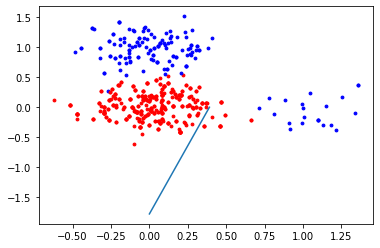

In [5]:
n.mostra_grafico()

In [23]:
def previsao():
    real = []
    previsto = []
    numero_de_acertos = 0
    numero_de_erros   = 0
    for i in n.x_teste:
        entrada = np.concatenate((np.array([n.vies]), i[:2]))
        
        yd = int(i[2:])
        yr = round(entrada.dot(n.pesos),4)
        yr = n.funcao_ativacao(yr)
        
        if(yr == yd):
            numero_de_acertos+=1
        else:
            numero_de_erros+=1
        
        real.append(yd)
        previsto.append(yr)
        
    acc = numero_de_acertos/ (numero_de_acertos+numero_de_erros)
    return numero_de_acertos, numero_de_erros, real, previsto, acc

In [24]:
numero_de_acertos, numero_de_erros, real, previsto, acc = previsao()

In [25]:
print("Quantidade de acertos: ", numero_de_acertos, "\nQuantidade de erros  : " ,numero_de_erros)

Quantidade de acertos:  165 
Quantidade de erros  :  75


# Matriz de confusão

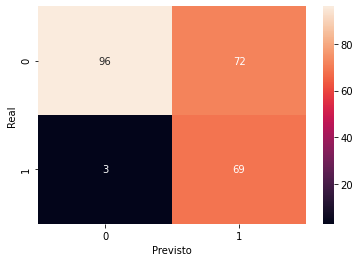

In [26]:
results = {'real': real, 'previsto': previsto}
results_df = pd.DataFrame.from_dict(results)
confusion_matrix = pd.crosstab(results_df['real'], results_df['previsto'], rownames=['Real'], colnames=['Previsto'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()


# Acurácia

In [28]:
print("A acurácia é:", acc)

A acurácia é: 0.6875


In [36]:
 confusion_matrix.values

array([[96, 72],
       [ 3, 69]])

In [37]:
tn = confusion_matrix.values[0][0]
fp = confusion_matrix.values[0][1]
fn = confusion_matrix.values[1][0]
tp = confusion_matrix.values[1][1]
tn, fp, fn, tp

(96, 72, 3, 69)

# Precisão

In [38]:
precision = tp/(tp+fp)
print("A precisao e:", precision)

A precisao e: 0.48936170212765956


# Revocação

In [39]:
recall = tp/(tp+fn)
print("A revocacao e:", recall)

A revocacao e: 0.9583333333333334


# F-Score

In [41]:
f_score = (2*(precision*recall))/(precision+recall)
print("O valor de F-Score e:", f_score)

O valor de F-Score e: 0.6478873239436619
